In [1]:
from periomod.wrapper import BenchmarkWrapper, EvaluatorWrapper

wrapper = BenchmarkWrapper(
    task="improve",
    encodings=["one_hot"],
    learners=["xgb", "rf", "lr"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo"],
    criteria=["f1"],
    sampling=[None],
    n_configs=5,
    n_jobs=-1,
)

wrapper.baseline()

,Model,Encoding,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,Dummy Classifier,one_hot,0.000000,0.000000,0.000000,0.712523,0.204865,0.500000,"[[0, 1095], [0, 2714]]",None
1,Logistic Regression,one_hot,0.175038,0.525114,0.105023,0.715411,0.195039,0.642057,"[[115, 980], [104, 2610]]",None
2,Random Forest,one_hot,0.146453,0.444444,0.087671,0.706222,0.200429,0.611289,"[[96, 999], [120, 2594]]",None


In [2]:
benchmark, learners = wrapper.wrapped_benchmark()

In [3]:
benchmark

,Task,Learner,Tuning,HPO,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,improve,xgb,holdout,hebo,f1,None,None,0.4565,0.2987,0.9680,0.3374,0.2176,0.6196,"[[1060, 35], [2489, 225]]",0.98
1,improve,rf,holdout,hebo,f1,None,None,0.4679,0.3096,0.9571,0.3741,0.2366,0.6566,"[[1048, 47], [2337, 377]]",0.60
2,improve,lr,holdout,hebo,f1,None,None,0.4613,0.3032,0.9644,0.3526,0.2455,0.6410,"[[1056, 39], [2427, 287]]",0.69


In [4]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="f1",
    aggregate=True,
)

In [6]:
evaluator.average_over_splits()

,Task,Learner,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Best Threshold,Confusion Matrix
0,improve,rf,f1,None,None,0.454,0.3018,0.9185,0.3875,0.2357,0.6297,0.6,"[[1024, 91], [2369, 538]]"


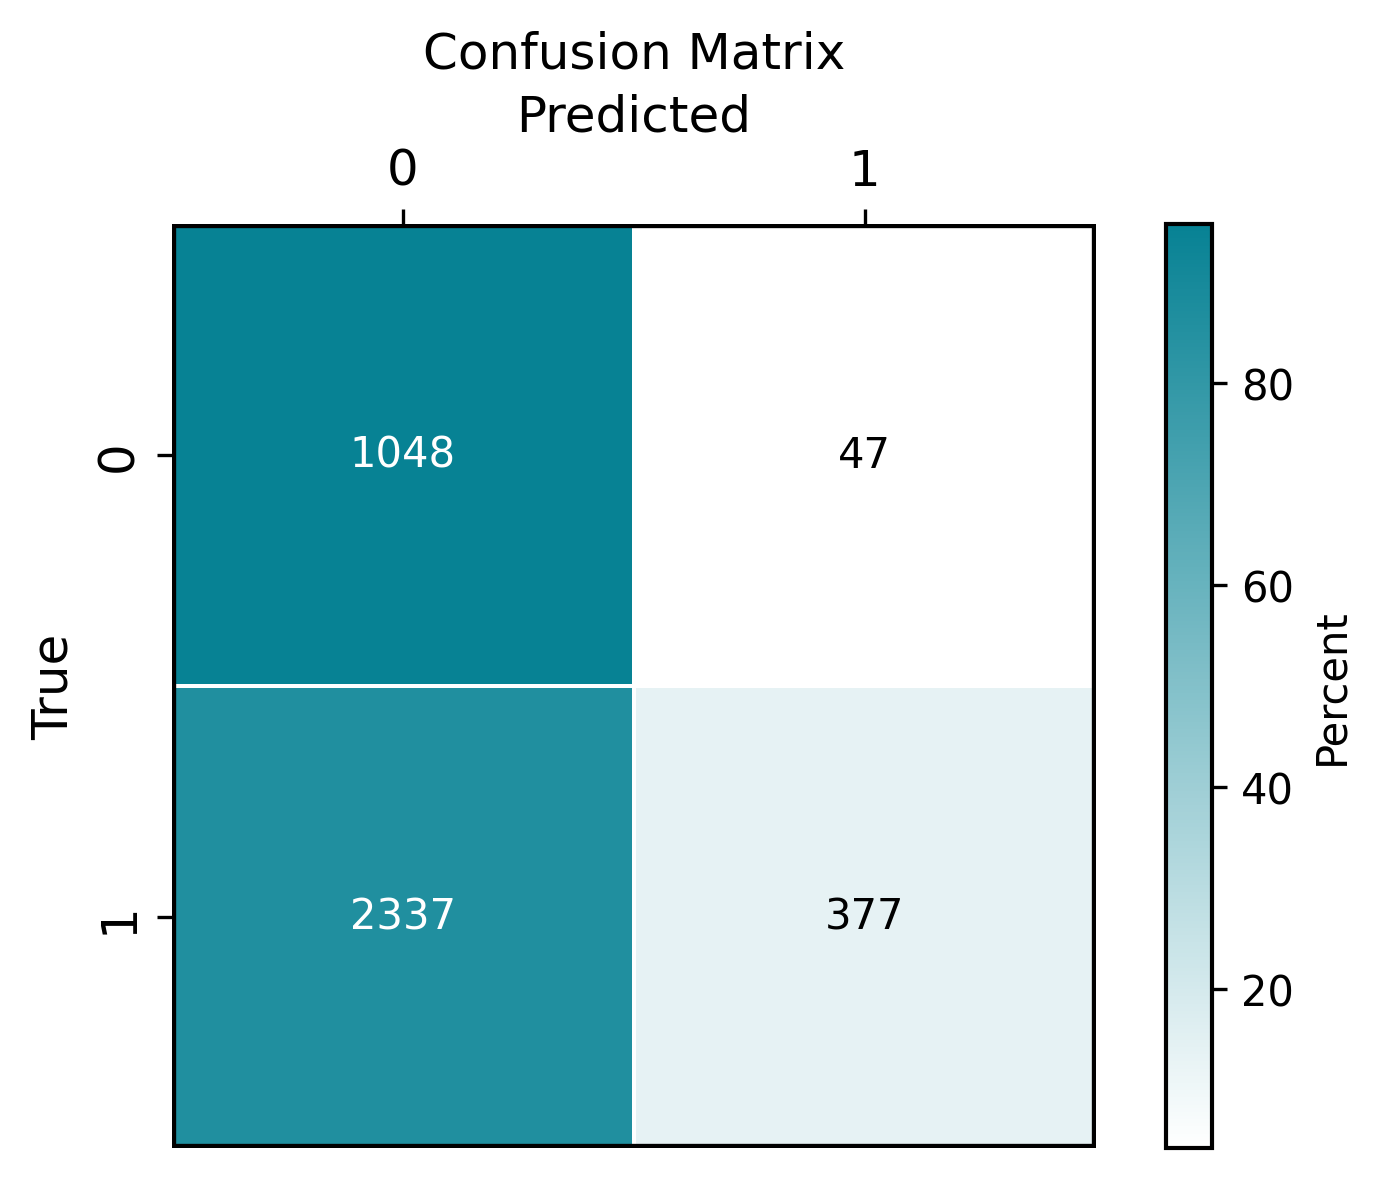

Average and Median Brier Scores by y:
   y      mean    median
0  0  0.234868  0.214628
1  1  0.237258  0.236848


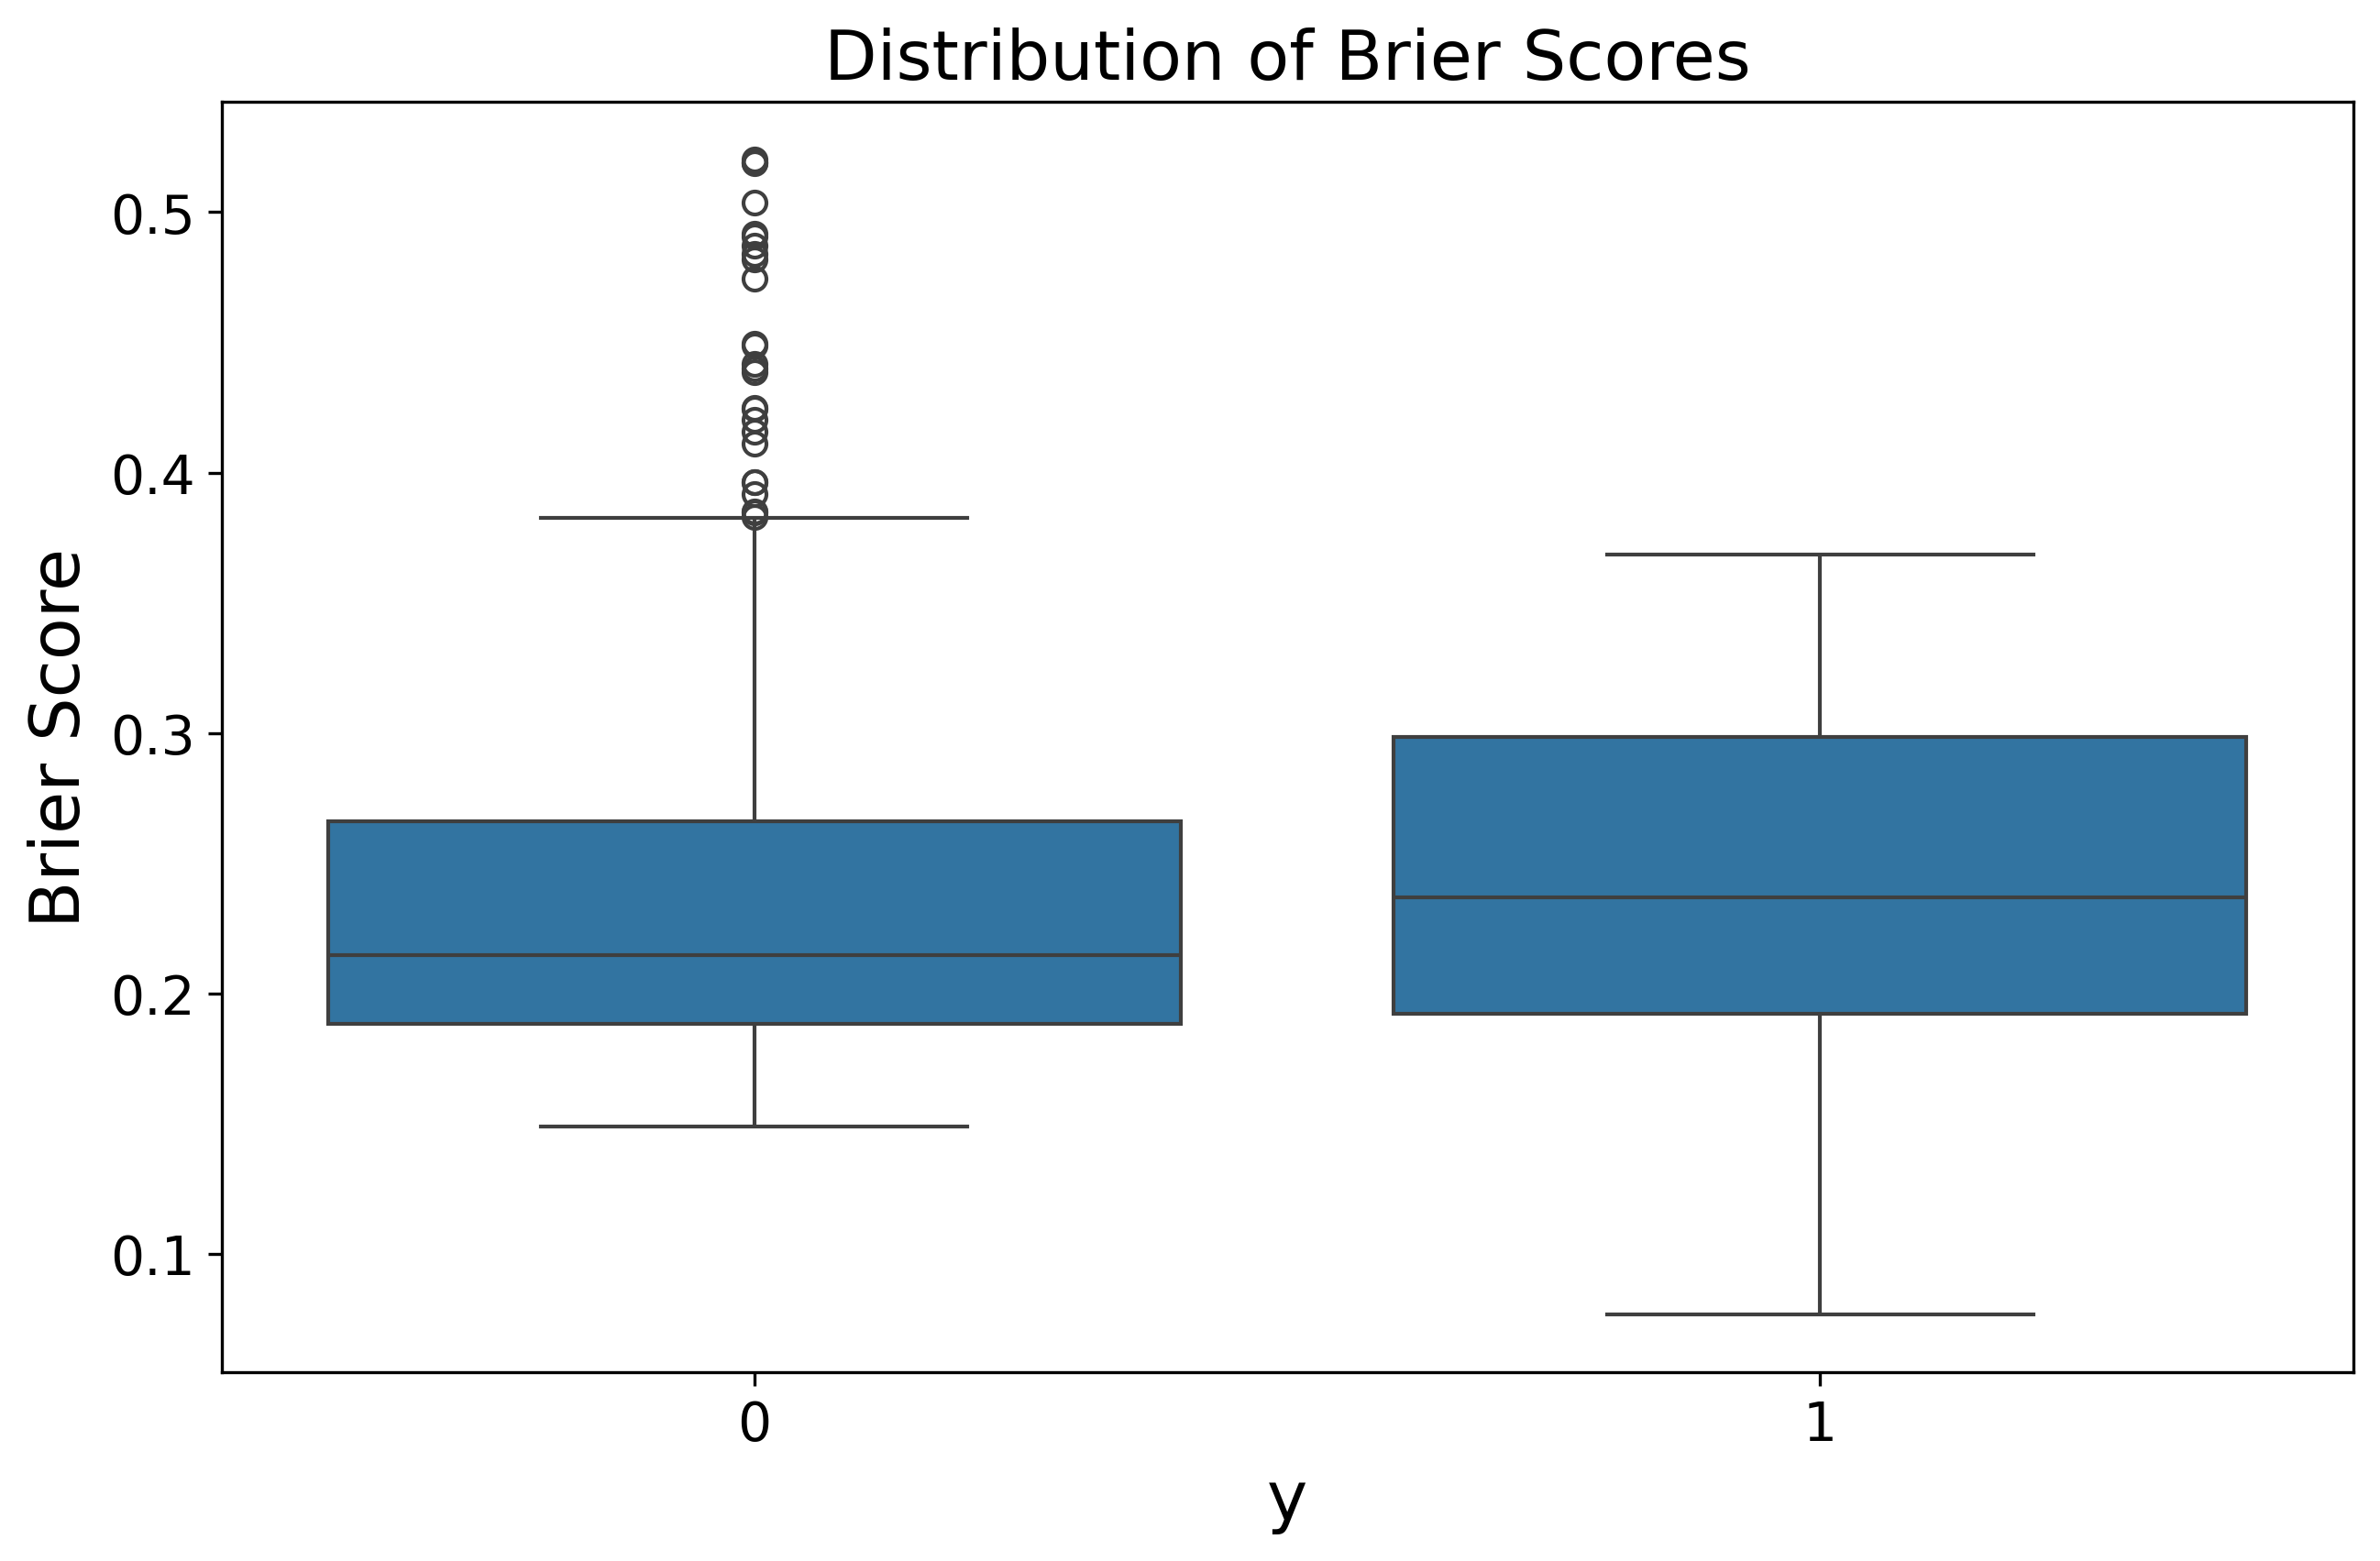


Mean Brier Score per cluster:
 Cluster
0    0.233413
1    0.266373
2    0.233585
Name: Brier_Score, dtype: float64 

Number of observations per cluster:
 Cluster
0    2883
1     362
2     564
Name: count, dtype: int64


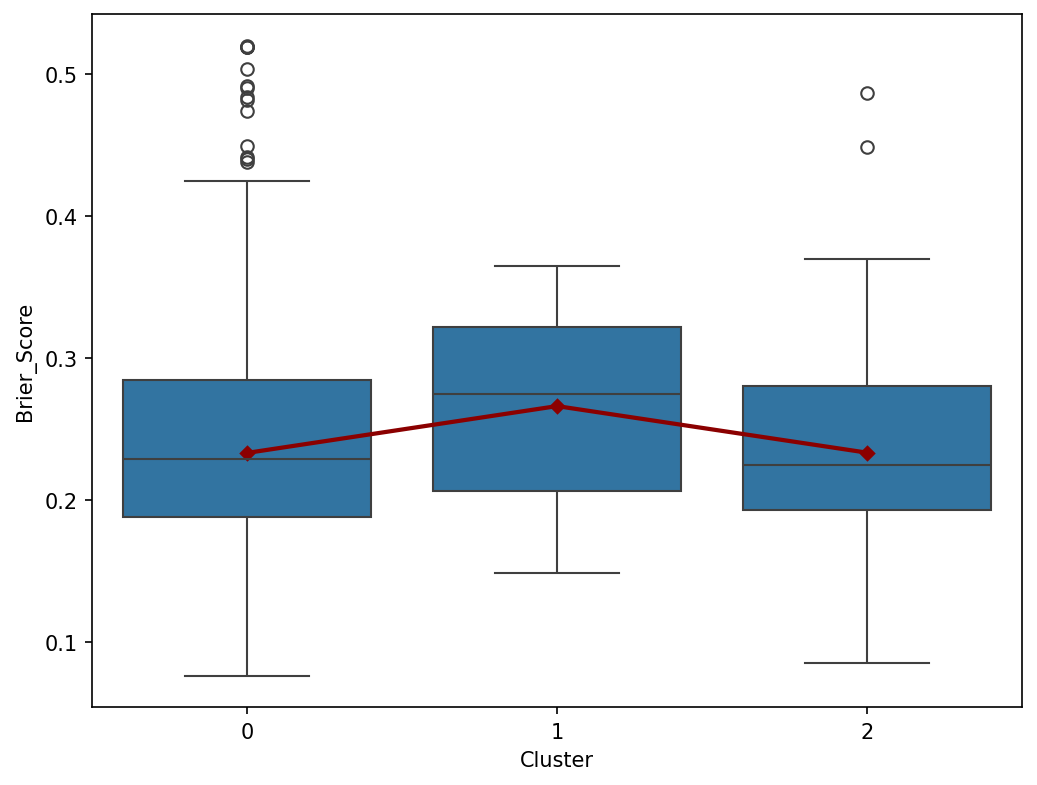

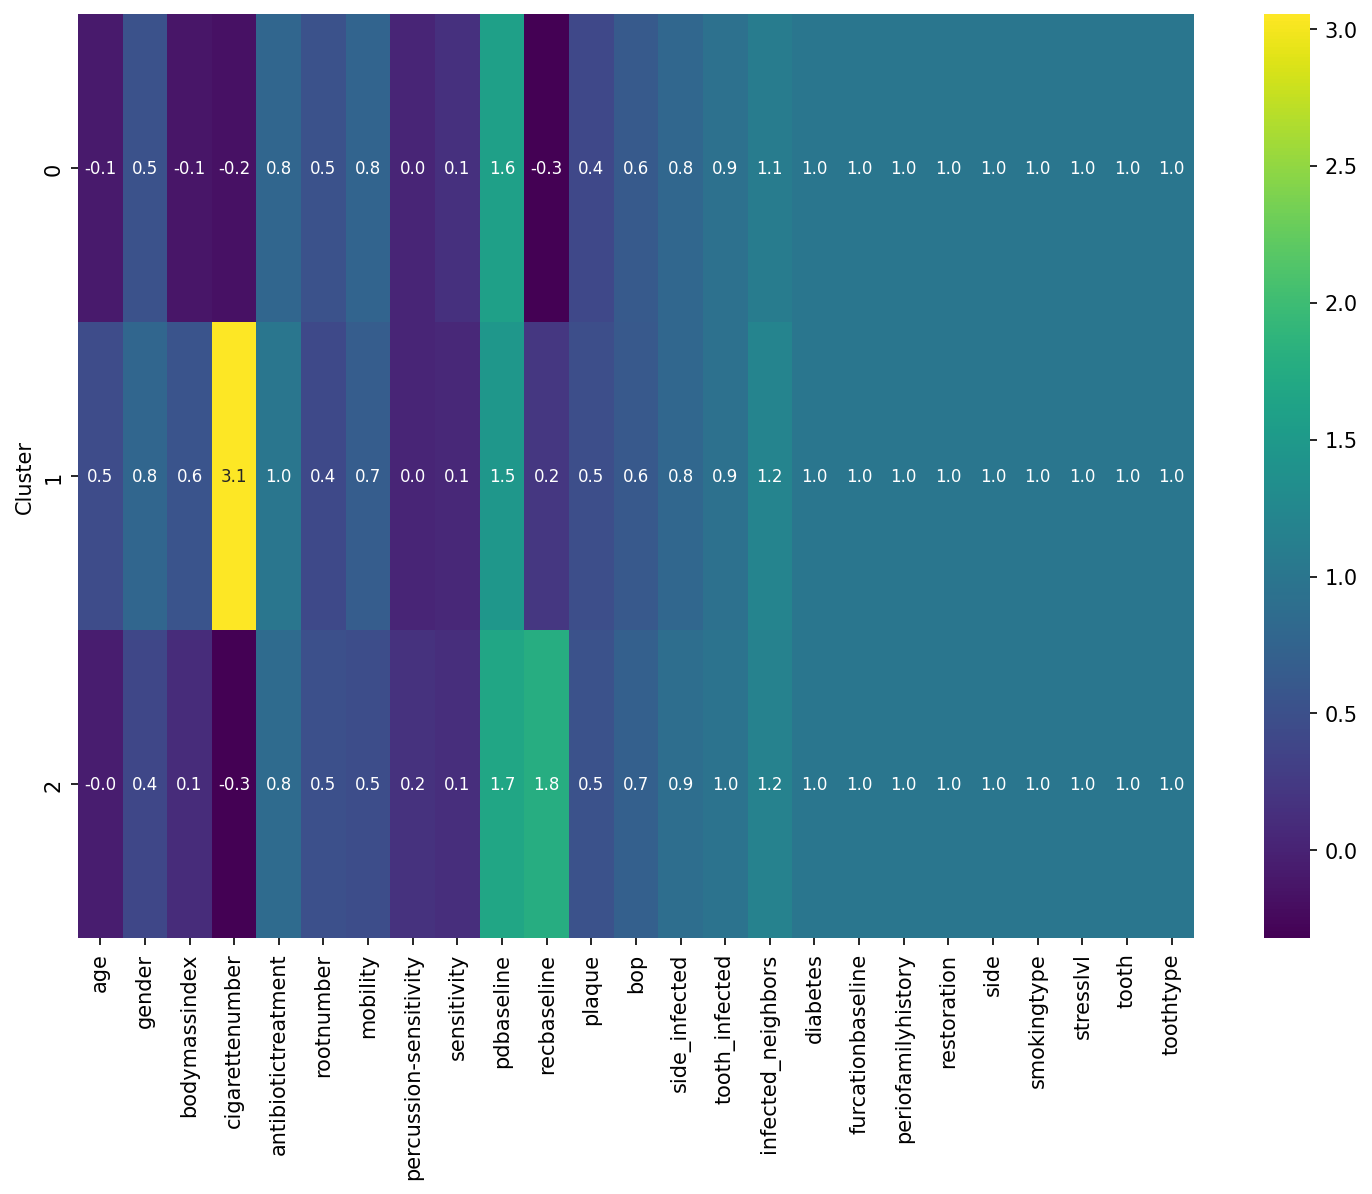

In [7]:
evaluator.wrapped_evaluation()

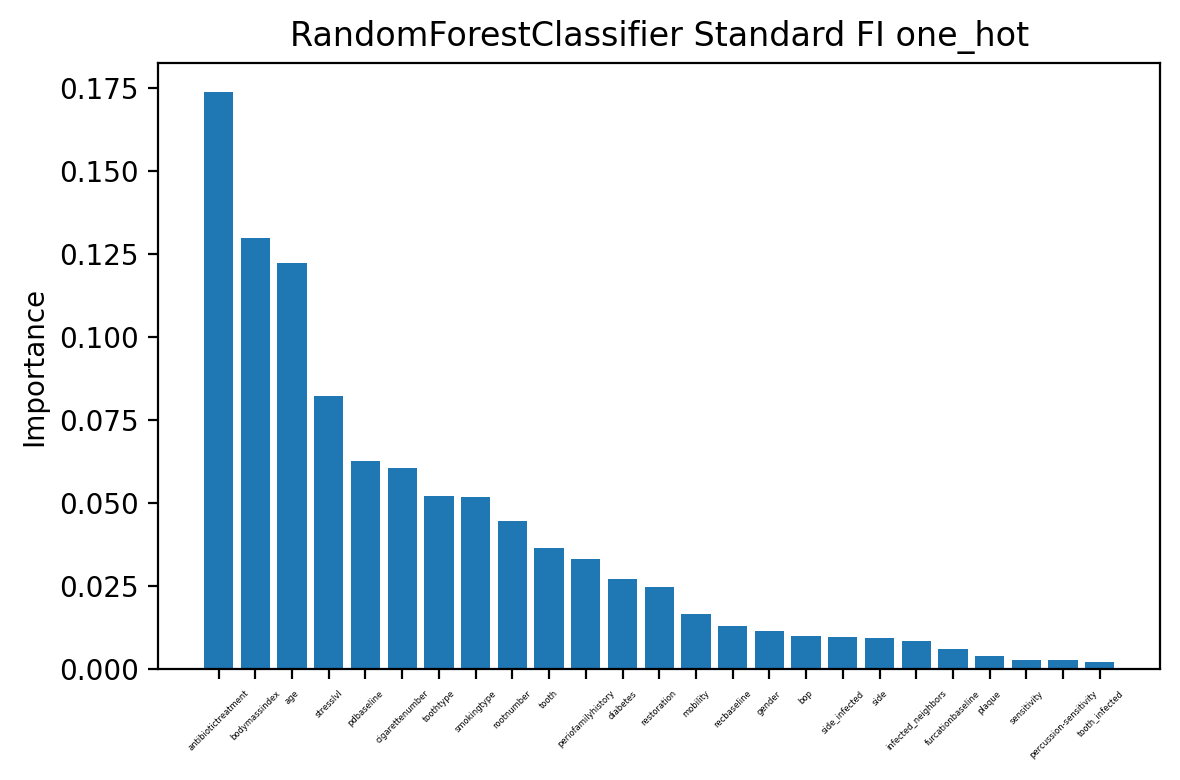

In [5]:
evaluator.evaluate_feature_importance(fi_types=["standard"])